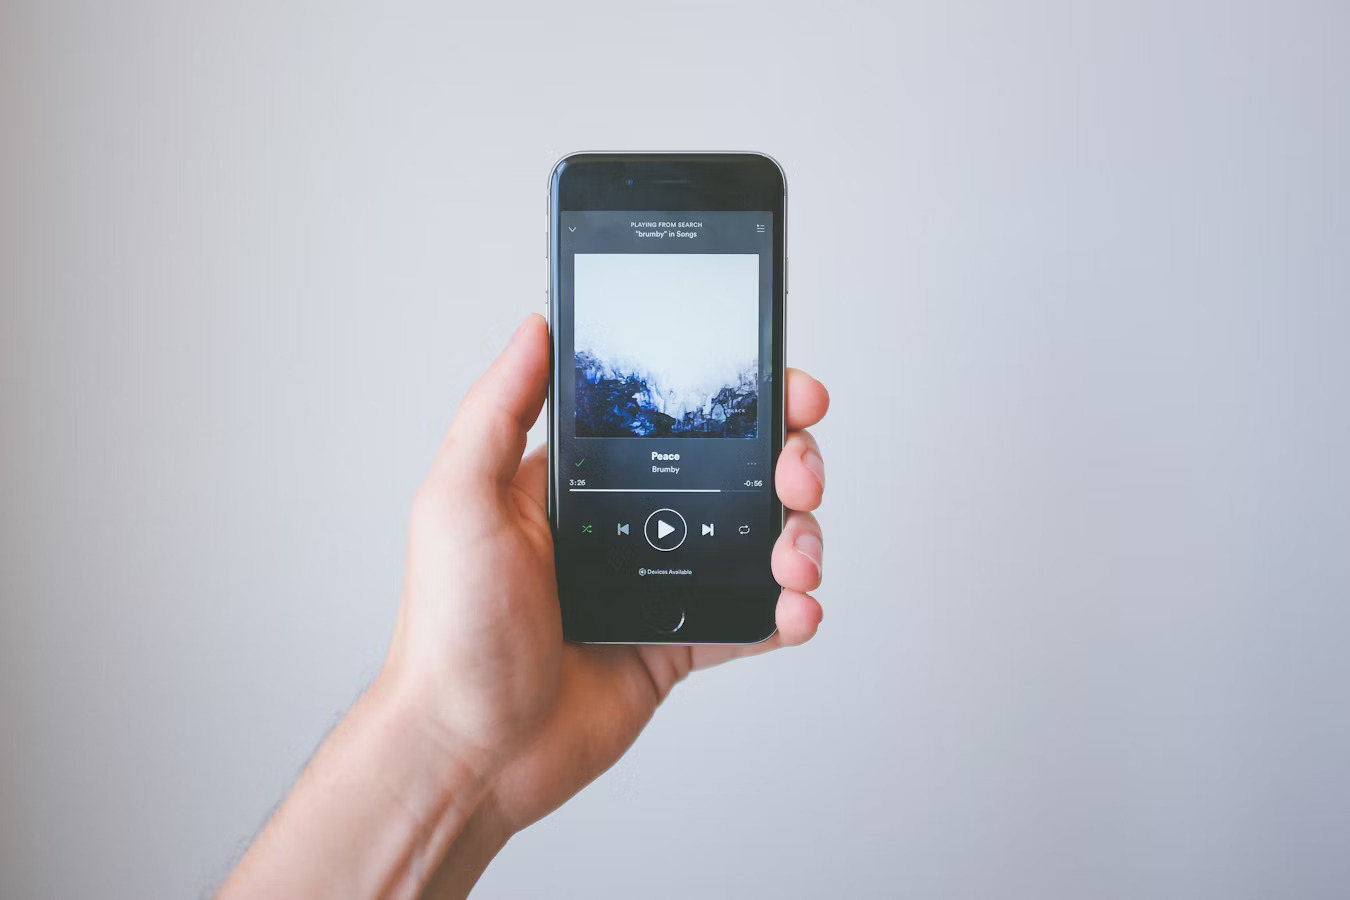

## **Daftar Kelompok**


* Mochamad Irfan Sulifan (202110370311162)
* Nurrahman Aditya Budyanto (202110370311183)



# DAFTAR ISI
Selected dataset : Spotify genre data <br>
Import library <br>
Download data <br>
Load dataset <br>
Handling missing value <br>
Visualisasi Karakteristik lagu dan genrenya <br>
Analisis Karakteristik lagu dan genre yang dapat diambil insightnya <br>
Analisis genre dan subgenre playlist dapat mempengaruhi seberapa populer sebuah lagu ✅<br>
Analisis korelasi antara danceability, energy, loudness, dan valencepada genre lagu✅


**Data Dictionary** <br>
* track_id : ID unik untuk setiap lagu, digunakan sebagai identifikasi dalam database Spotify.<br>
Contoh: 3n3Ppam7vgaVa1iaRUc9Lp.

* track_name : Nama lagu.<br>
Contoh: Shape of You.

* track_artist: Nama artis atau grup musik yang menyanyikan lagu.<br>
Contoh: Ed Sheeran.

* track_popularity : Popularitas lagu, diukur dengan skor 0–100 berdasarkan jumlah pemutaran dan interaksi pengguna.<br>
Contoh: 85.

* track_album_id : ID unik untuk album tempat lagu berada.<br>
Contoh: 6GZFiz5qZhI6t7ytrfqEpO.

* track_album_name : Nama album tempat lagu berada.<br>
Contoh: Divide.

* track_album_release_date : Tanggal rilis album tempat lagu berada, dalam format YYYY-MM-DD.<br>
Contoh: 2017-03-03.

* playlist_name : Nama playlist Spotify yang memuat lagu tersebut.<br>
Contoh: Top Hits 2023.

* playlist_id : ID unik untuk playlist tempat lagu ditemukan.<br>
Contoh: 37i9dQZF1DXcBWIGoYBM5M.

* playlist_genre : Genre utama playlist tempat lagu ditemukan, seperti Pop, Rock, atau EDM.<br>
Contoh: Pop.

* playlist_subgenre : Subgenre dari playlist tempat lagu ditemukan.<br>
Contoh: Dance Pop.

* danceability : Skor 0–1 yang mengukur seberapa cocok lagu untuk menari berdasarkan ritme, stabilitas beat, dan pola musik.<br>
Contoh: 0.85.

* energy : Skor 0–1 yang mengukur intensitas dan aktivitas lagu. Lagu dengan skor tinggi cenderung memiliki tempo cepat dan suara kuat.<br>
Contoh: 0.75.

* key : Nada dasar dari lagu (0–11), di mana 0 adalah C, 1 adalah C#, dan seterusnya.<br>
Contoh: 5 (F).

* loudness : Tingkat volume rata-rata lagu dalam desibel (dB).<br>
Contoh: -5.6.

* mode : Mode dari skala lagu, di mana 0 adalah minor dan 1 adalah mayor.<br>
Contoh: 1 (mayor).

* speechiness : Skor 0–1 yang menunjukkan keberadaan elemen vokal. Lagu dengan skor tinggi cenderung berupa pidato atau dialog.<br>
Contoh: 0.05.

* acousticness : Skor 0–1 yang mengukur sejauh mana lagu bersifat akustik.<br>
Contoh: 0.34.

* instrumentalness : Skor 0–1 yang menunjukkan apakah lagu hampir seluruhnya instrumental (tanpa vokal).<br>
Contoh: 0.91.

* liveness : Skor 0–1 yang mengukur kemungkinan lagu direkam di depan penonton langsung.<br>
Contoh: 0.12.

* valence : Skor 0–1 yang mengukur emosional lagu, di mana skor tinggi berarti lagu cenderung positif dan ceria.<br>
Contoh: 0.67.

* tempo : Kecepatan lagu dalam beat per minute (BPM).<br>
Contoh: 120.

* duration_ms : Durasi lagu dalam milidetik.<br>
Contoh: 210000 (3 menit 30 detik).<br>

Kolom-kolom ini mencakup informasi komprehensif yang bisa digunakan untuk analisis musik, popularitas, dan karakteristik lagu secara mendalam.

**Import Package yang dibutuhkan**

In [65]:
import zipfile
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene

##**Pengambilan data**

In [66]:
# Buat folder untuk menyimpan file yang diunduh (opsional)
!mkdir -p /content/spotify_songs

# Download file dari Dropbox menggunakan wget
!wget -O /content/spotify_songs/dropbox_files.zip "https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1"

zip_path = '/content/spotify_songs/dropbox_files.zip'
extract_path = '/content/spotify_songs'

# Ekstrak file ZIP ke folder tujuan
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Tampilkan daftar file yang diekstrak
print("Daftar file yang diekstrak:")
print(os.listdir(extract_path))


--2025-01-04 17:42:32--  https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/gw3fns50k4c06ljfi01r9/AIOARdAHIs2pK8UfTEBooBs?rlkey=vouxv2k7qt2kqjmeg11793eai&dl=1 [following]
--2025-01-04 17:42:32--  https://www.dropbox.com/scl/fo/gw3fns50k4c06ljfi01r9/AIOARdAHIs2pK8UfTEBooBs?rlkey=vouxv2k7qt2kqjmeg11793eai&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc27665b730936019535b56bfef0.dl.dropboxusercontent.com/zip_download_get/CE81kAXzVoP0QrV53Zw6SlQKIZ-lNPScIUilzpKXVc_PuiCIXHBo3UD4dhtiWCyxAcgBzBgj3pst-MAwJvRjjMvpyhFAbIRnbOic-adqL7ZzKw# [following]
--2025-01-04 17:42:33--  https://uc27665b730936019535b56bfef0.dl.dropboxusercontent.com/zip_

##**Data Cleaning**

In [67]:
# Load dataset
file_path = '/content/spotify_songs/spotify_songs.csv'
df = pd.read_csv(file_path)

# Lihat informasi awal dataset
print("Informasi awal dataset:")
print(df.info())

# Hapus duplikasi jika ada
df = df.drop_duplicates()
print("\nSetelah menghapus duplikasi, jumlah baris:", len(df))

# Tangani nilai yang hilang
# 1. Periksa jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
print("\nJumlah nilai yang hilang per kolom:")
print(missing_values)

# 2. Contoh: Mengisi nilai yang hilang dengan strategi tertentu (mean/median/modus atau nilai khusus)
# Misal: Mengisi nilai numerik yang hilang dengan mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Misal: Mengisi nilai kategori yang hilang dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek kembali apakah ada nilai yang hilang
print("\nSetelah mengisi nilai yang hilang:")
print(df.isnull().sum())

# Ubah tipe data jika perlu
# Contoh: Konversi kolom dengan tipe tidak sesuai
# df['example_column'] = df['example_column'].astype('int')

# Simpan dataset yang sudah dibersihkan
cleaned_file_path = '/content/spotify_songs/spotify_songs_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print("\nDataset yang sudah dibersihkan disimpan di:", cleaned_file_path)


Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-n

##**Visualisasi Karakteristik Lagu**

### **Jumlah lagu tiap Genre**

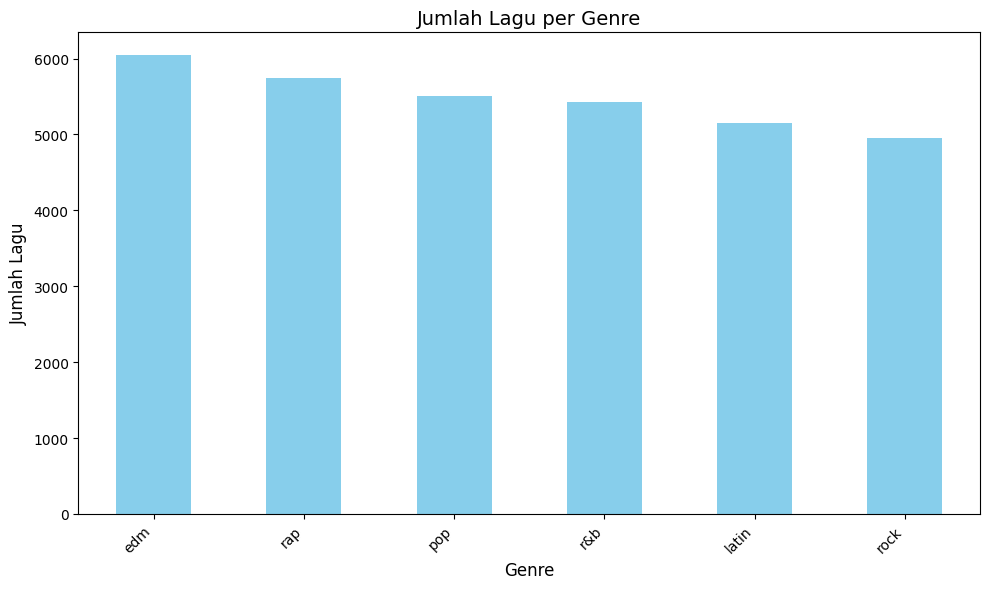

In [68]:
df = pd.read_csv(cleaned_file_path)
# Hitung jumlah lagu per genre
genre_counts = df['playlist_genre'].value_counts()

# Visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Lagu per Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan plot
plt.show()


### **Jumlah album yang dirilis dalam rentang tiap 10 tahun**

Bins: [1956, 1961, 1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006, 2011, 2016, 2021]
Labels: ['1956-1960', '1961-1965', '1966-1970', '1971-1975', '1976-1980', '1981-1985', '1986-1990', '1991-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020']


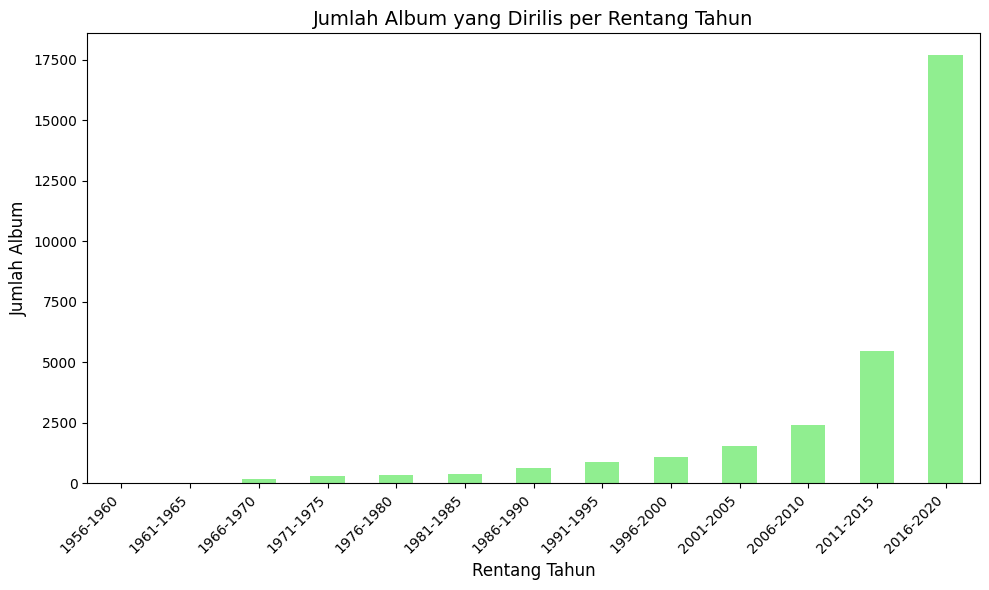

In [69]:
# Pastikan kolom 'track_album_release_date' berformat datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Ekstrak tahun rilis album
df['release_year'] = df['track_album_release_date'].dt.year

# Tentukan rentang tahun mulai dari 1956 hingga 2020 dengan langkah 5 tahun
bins = list(range(1956, 2026, 5))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Tampilkan bins dan labels untuk memastikan hasilnya
print("Bins:", bins)
print("Labels:", labels)


# Kelompokkan tahun rilis berdasarkan rentang yang telah ditentukan
df['release_range'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=False)

# Hitung jumlah album per rentang tahun
album_counts_per_range = df['release_range'].value_counts().sort_index()

# Visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
album_counts_per_range.plot(kind='bar', color='lightgreen')
plt.title('Jumlah Album yang Dirilis per Rentang Tahun', fontsize=14)
plt.xlabel('Rentang Tahun', fontsize=12)
plt.ylabel('Jumlah Album', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan plot
plt.show()


### **Nilai rata - rata Genre Paling Populer**

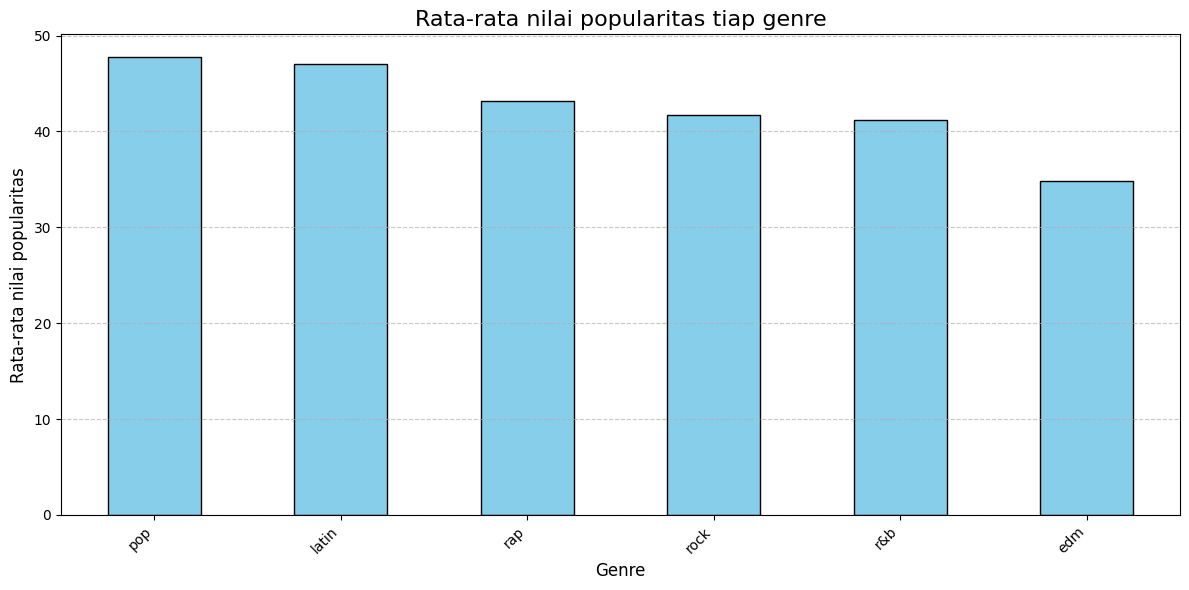

In [70]:
# Group by genre and calculate the mean popularity
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata nilai popularitas tiap genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rata-rata nilai popularitas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### **Genre Populer pada tahun tertentu**

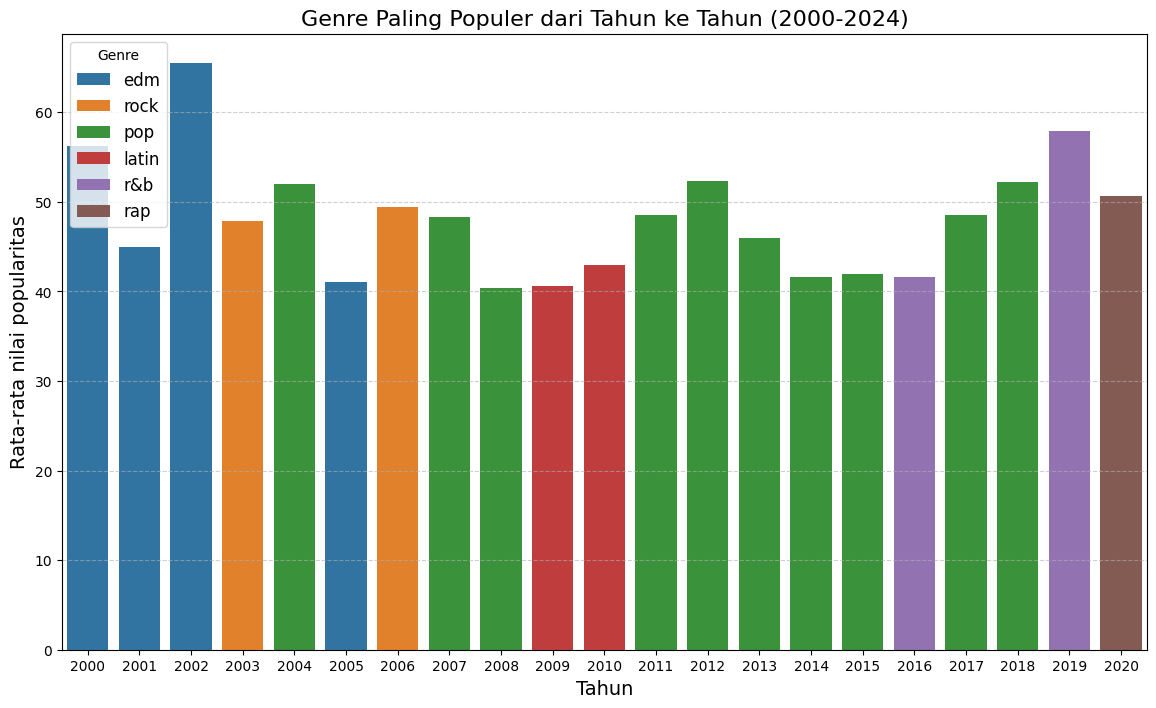

In [83]:
# Convert release date to datetime and extract year
df['release_year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year.astype('Int64')

# Filter data for the range 2000-2024
df_filtered = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2024)]

# Determine the most popular genre for each year
genre_popularity = df_filtered.groupby(['release_year', 'playlist_genre'])['track_popularity'].mean().reset_index()
most_popular_genre = genre_popularity.loc[genre_popularity.groupby('release_year')['track_popularity'].idxmax()]

# Plot the most popular genre over the years
plt.figure(figsize=(14, 8))
sns.barplot(x='release_year', y='track_popularity', hue='playlist_genre', data=most_popular_genre, dodge=False)

plt.title('Genre Paling Populer dari Tahun ke Tahun (2000-2024)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Rata-rata nilai popularitas', fontsize=14)
plt.legend(title='Genre', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## **Analisis Karakteristik lagu dan genre yang dapat diambil insightnya**

### **Analisis genre dan subgenre playlist yang dapat mempengaruhi seberapa populer sebuah lagu**

In [72]:
# Cek nilai unik dalam genre dan subgenre
print(df['playlist_genre'].unique())
print(df['playlist_subgenre'].unique())

# Statistik deskriptif popularitas
print(df['track_popularity'].describe())


['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']
count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64


In [73]:
# Hitung rata-rata popularitas berdasarkan genre
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Hitung rata-rata popularitas berdasarkan subgenre
subgenre_popularity = df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False)

# Tampilkan 10 genre/subgenre teratas berdasarkan popularitas
print("Top 10 Genre:")
print(genre_popularity.head(10))
print("\nTop 10 Subgenre:")
print(subgenre_popularity.head(10))


Top 10 Genre:
playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64

Top 10 Subgenre:
playlist_subgenre
post-teen pop         56.825509
permanent wave        54.000905
hip pop               53.844745
hip hop               53.773071
reggaeton             52.869336
dance pop             52.079353
latin pop             51.099842
urban contemporary    50.523843
trap                  50.308288
pop edm               45.686223
Name: track_popularity, dtype: float64


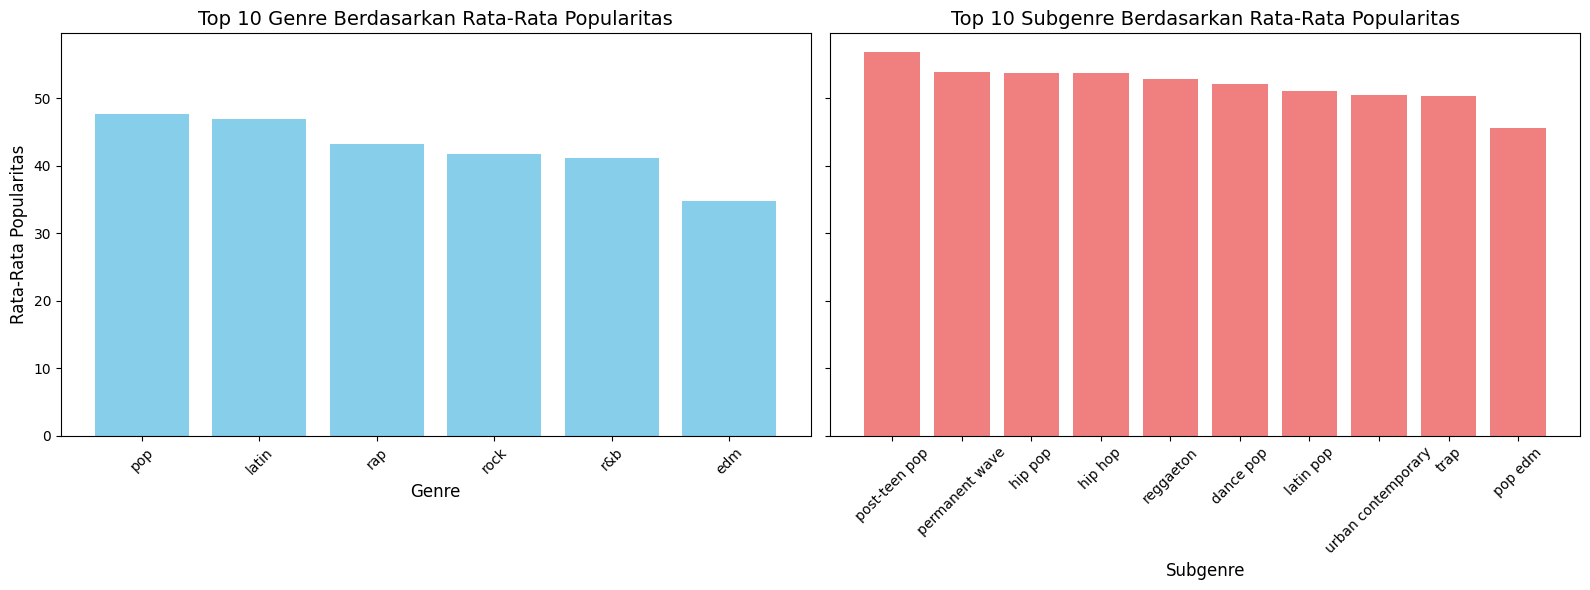

In [74]:
# Persiapkan data: ambil 10 genre dan subgenre teratas berdasarkan popularitas
top_genre_popularity = genre_popularity.head(10)
top_subgenre_popularity = subgenre_popularity.head(10)

# Buat figure dengan 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot rata-rata popularitas berdasarkan genre
axes[0].bar(top_genre_popularity.index, top_genre_popularity.values, color='skyblue')
axes[0].set_title('Top 10 Genre Berdasarkan Rata-Rata Popularitas', fontsize=14)
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Rata-Rata Popularitas', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot rata-rata popularitas berdasarkan subgenre
axes[1].bar(top_subgenre_popularity.index, top_subgenre_popularity.values, color='lightcoral')
axes[1].set_title('Top 10 Subgenre Berdasarkan Rata-Rata Popularitas', fontsize=14)
axes[1].set_xlabel('Subgenre', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Sesuaikan tata letak
plt.tight_layout()

# Tampilkan plot
plt.show()


Levene's Test untuk danceability: stat=72.041, p=0.000
Ada perbedaan varians antar genre.



<Figure size 1400x700 with 0 Axes>

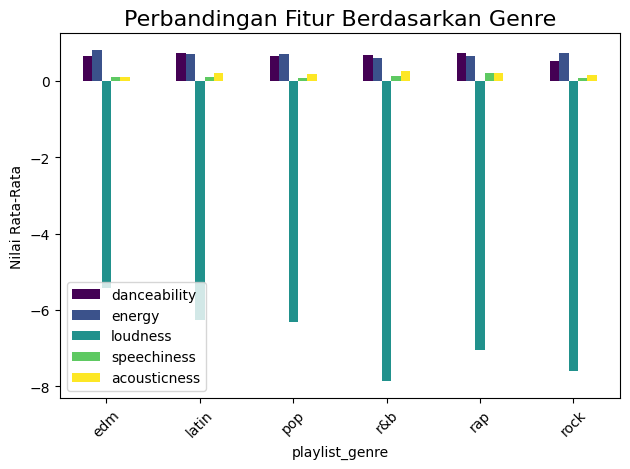

<Figure size 1200x800 with 0 Axes>

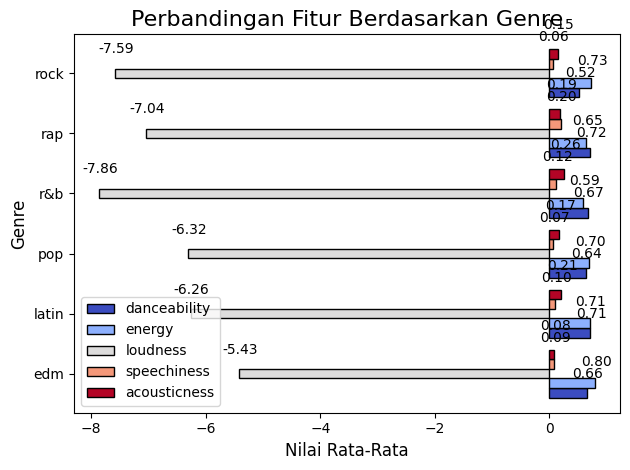

In [75]:
genre_groups = [df[df['playlist_genre'] == genre]['danceability'] for genre in df['playlist_genre'].unique()]
stat, p = levene(*genre_groups)
print(f"Levene's Test untuk danceability: stat={stat:.3f}, p={p:.3f}")
if p < 0.05:
    print("Ada perbedaan varians antar genre.\n")
else:
    print("Tidak ada perbedaan varians antar genre.\n")

# Pilih kolom yang relevan
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'playlist_genre']

# Filter data yang relevan
df_features = df[features].dropna()

# Hitung rata-rata fitur per genre
genre_means = df_features.groupby('playlist_genre').mean()

# Visualisasi Bar Plot untuk membandingkan fitur antar genre
plt.figure(figsize=(14, 7))
genre_means.plot(kind='bar', colormap='viridis')
plt.title('Perbandingan Fitur Berdasarkan Genre', fontsize=16)
plt.ylabel('Nilai Rata-Rata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Perbandingan Fitur Berdasarkan Genre (Horizontal Bar Plot)
plt.figure(figsize=(12, 8))
genre_means.plot(kind='barh', colormap='coolwarm', edgecolor='black', width=0.8)
# Menambahkan label nilai pada setiap bar
for i, genre in enumerate(genre_means.index):
    for j, feature in enumerate(genre_means.columns):
        value = genre_means.iloc[i, j]
        plt.text(value + 0.02, i + (j * 0.2), f'{value:.2f}', ha='center', va='center', fontsize=10)

plt.title('Perbandingan Fitur Berdasarkan Genre', fontsize=16)
plt.xlabel('Nilai Rata-Rata', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()

# Menampilkan plot
plt.show()


#### Penjelasan Berdasarkan Visualisasi:
Setelah visualisasi bar plot tersebut ditampilkan, kita dapat menarik kesimpulan berdasarkan fitur yang dominan di setiap genre.

Danceability: Genre Pop dan EDM memiliki nilai tinggi pada danceability, yang berarti lagu-lagu dari genre ini sangat cocok untuk menari atau bergerak.

Energy: Rock dan EDM lebih menonjol pada energy, yang menunjukkan bahwa lagu-lagu ini cocok untuk situasi yang membutuhkan energi tinggi atau atmosfer yang lebih bersemangat.

Loudness: Rock, Rap, dan EDM menonjol pada loudness, menciptakan pengalaman mendengarkan yang keras dan kuat.

Speechiness: Rap menjadi genre dengan nilai speechiness yang sangat tinggi, mengindikasikan bahwa rap lebih banyak berbicara atau menyampaikan pesan melalui lirik.

Acousticness: R&B dan Latin akan memiliki nilai acousticness yang lebih tinggi, dengan instrumen alami atau tradisional yang menjadi ciri khas genre tersebut.